In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import sklearn

In [21]:
class NeuralNetwork:
    def __init__(self):
        self.num_input = 2
        self.num_hidden_layer1 = 14
        self.num_hidden_layer2 = 10
        self.num_hidden_layer3 = 36
        self.num_output = 3

        self.lr = 0.01
        np.random.seed(42)

        self.weights_input_h1 = np.random.randn(self.num_input, self.num_hidden_layer1) * 0.1
        self.weights_h1_h2 = np.random.randn(self.num_hidden_layer1, self.num_hidden_layer2) * 0.1
        self.weights_h2_h3 = np.random.randn(self.num_hidden_layer2, self.num_hidden_layer3) * 0.1
        self.weights_h3_out = np.random.randn(self.num_hidden_layer3, self.num_output) * 0.1

    def activation_relu(self, z, deriv=False):
        if deriv:
            return np.where(z > 0, 1, 0)
        return np.maximum(0, z)

    def activation_softmax(self, z, deriv=False):
        exp_scores = np.exp(z - np.max(z, axis=1, keepdims=True))
        softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        if deriv:
            return softmax * (1 - softmax)
        return softmax

    def forward_pass(self, data):
        input_h1 = np.dot(data, self.weights_input_h1)
        self.output_h1 = self.activation_relu(input_h1)

        input_h2 = np.dot(self.output_h1, self.weights_h1_h2)
        self.output_h2 = self.activation_relu(input_h2)

        input_h3 = np.dot(self.output_h2, self.weights_h2_h3)
        self.output_h3 = self.activation_relu(input_h3)

        input_out = np.dot(self.output_h3, self.weights_h3_out)
        predictions = self.activation_softmax(input_out)
        return predictions

    def backward_pass(self, data, labels, predictions):
        error_out = labels - predictions
        delta_out = self.lr * error_out

        error_h3 = delta_out.dot(self.weights_h3_out.T)
        delta_h3 = self.lr * error_h3 * self.activation_relu(self.output_h3, deriv=True)

        error_h2 = delta_h3.dot(self.weights_h2_h3.T)
        delta_h2 = self.lr * error_h2 * self.activation_relu(self.output_h2, deriv=True)

        error_h1 = delta_h2.dot(self.weights_h1_h2.T)
        delta_h1 = self.lr * error_h1 * self.activation_relu(self.output_h1, deriv=True)

        self.weights_input_h1 += data.T.dot(delta_h1)
        self.weights_h1_h2 += self.output_h1.T.dot(delta_h2)
        self.weights_h2_h3 += self.output_h2.T.dot(delta_h3)
        self.weights_h3_out += self.output_h3.T.dot(delta_out)

    def train(self, data, labels, epochs=100):
        for epoch in range(epochs):
            predictions = self.forward_pass(data)
            self.backward_pass(data, labels, predictions)
            if epoch % 10 == 0:
                loss = np.mean(-labels * np.log(predictions + 1e-8))
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

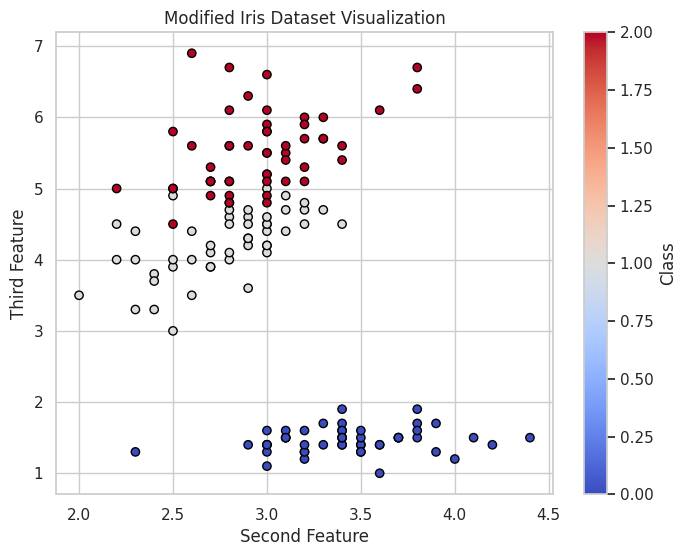

Training features shape: (112, 2)
Training labels shape: (112, 3)
Testing features shape: (38, 2)
Testing labels shape: (38, 3)


In [25]:
data = load_iris()

features = data.data[:, 1:3]
labels = data.target


if sklearn.__version__ >= "1.2":
    ohe = OneHotEncoder(sparse_output=False)
else:
    ohe = OneHotEncoder(sparse=False)

encoded_labels = ohe.fit_transform(labels.reshape(-1, 1))


plt.figure(figsize=(8, 6))
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap="coolwarm", edgecolor="black")
plt.title("Modified Iris Dataset Visualization")
plt.xlabel("Second Feature")
plt.ylabel("Third Feature")
plt.grid(True)
plt.colorbar(label="Class")
plt.show()


X_train, X_test, Y_train, Y_test = train_test_split(
    features, encoded_labels, test_size=0.25, random_state=123
)


print(f"Training features shape: {X_train.shape}")
print(f"Training labels shape: {Y_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Testing labels shape: {Y_test.shape}")


Epoch 0, Loss: 0.2312
Epoch 40, Loss: 0.1718
Epoch 80, Loss: 0.1731
Epoch 120, Loss: 0.1703
Epoch 160, Loss: 0.1702


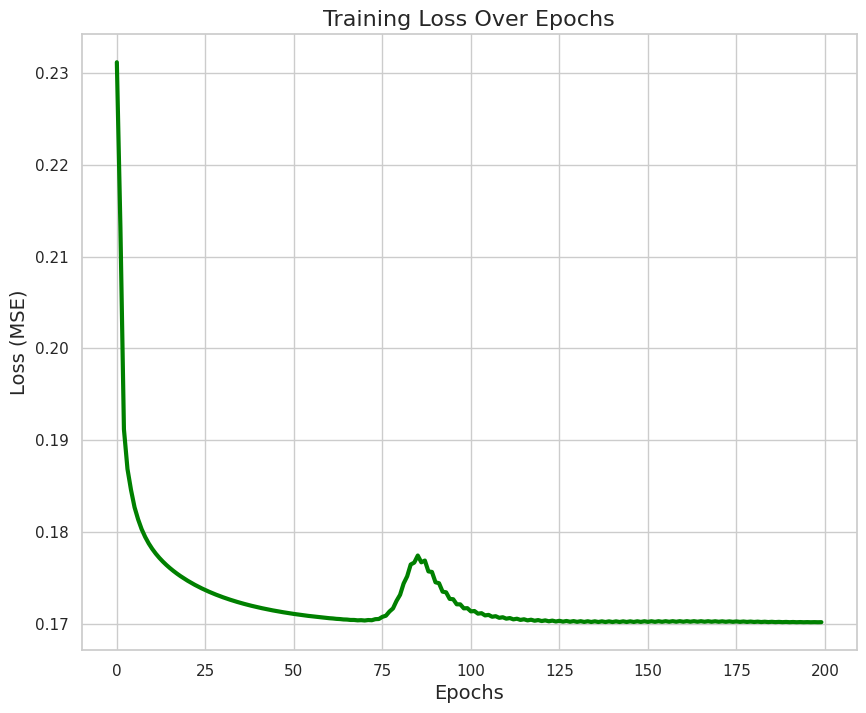

In [28]:

np.random.seed(99)


data_X = np.random.rand(100, 3)
data_Y = np.random.randint(0, 4, 100)
one_hot_labels = np.zeros((100, 4))
one_hot_labels[np.arange(100), data_Y] = 1

class NeuralNetwork:
    def __init__(self, input_size=3, hidden_size=5, output_size=4):

        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.zeros(hidden_size)
        self.bias_output = np.zeros(output_size)

    def forward_pass(self, X):

        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = np.tanh(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        output = self.softmax(self.output_layer_input)
        return output

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def train(self, X, y, learning_rate=0.01):

        output = self.forward_pass(X)
        output_error = output - y
        output_delta = output_error


        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * (1 - np.tanh(self.hidden_layer_input) ** 2)


        self.weights_hidden_output -= self.hidden_layer_output.T.dot(output_delta) * learning_rate
        self.weights_input_hidden -= X.T.dot(hidden_delta) * learning_rate
        self.bias_output -= np.sum(output_delta, axis=0) * learning_rate
        self.bias_hidden -= np.sum(hidden_delta, axis=0) * learning_rate


NN = NeuralNetwork()


training_epochs = 200
loss_history = []


for epoch in range(training_epochs):
    predictions = NN.forward_pass(data_X)
    loss = np.mean(np.square(one_hot_labels - predictions))  # Mean squared error
    loss_history.append(loss)
    NN.train(data_X, one_hot_labels)

    if epoch % 40 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


plt.figure(figsize=(10, 8))
plt.plot(loss_history, color='green', linewidth=3)
plt.title("Training Loss Over Epochs", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss (MSE)", fontsize=14)
plt.grid(True)
plt.show()


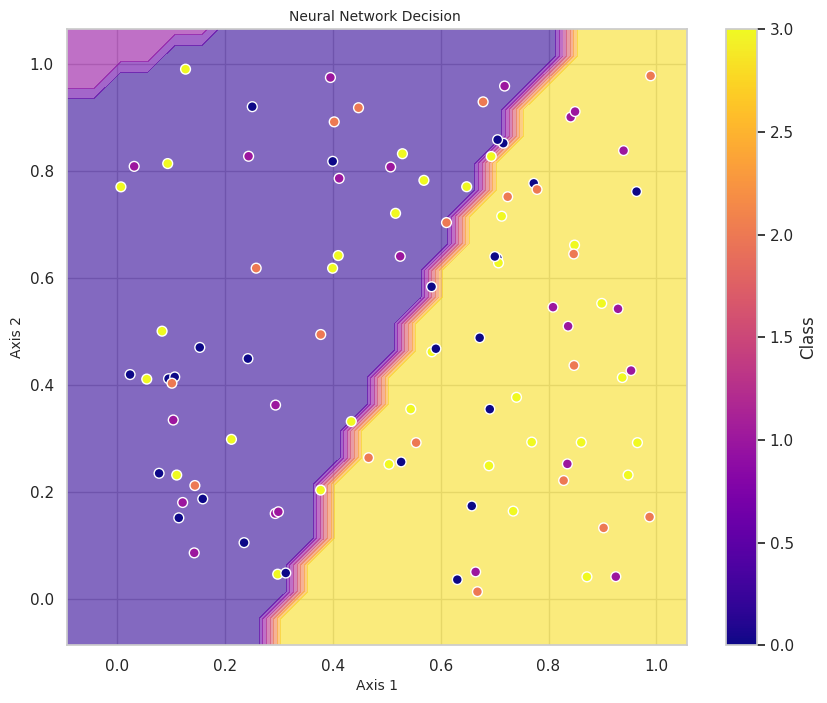

In [32]:

x_min, x_max = data_X[:, 0].min() - 0.1, data_X[:, 0].max() + 0.1
y_min, y_max = data_X[:, 1].min() - 0.1, data_X[:, 1].max() + 0.1


xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.05),
    np.arange(y_min, y_max, 0.05)
)


grid_predictions = NN.forward_pass(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape[0])])  # Added 3rd feature
grid_predictions = np.argmax(grid_predictions, axis=1)
grid_predictions = grid_predictions.reshape(xx.shape)


plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, grid_predictions, alpha=0.6, cmap="plasma")
plt.scatter(data_X[:, 0], data_X[:, 1], c=data_Y, cmap="plasma", edgecolor="white", s=50)
plt.title("Neural Network Decision ", fontsize=10)
plt.xlabel("Axis 1", fontsize=10)
plt.ylabel("Axis 2", fontsize=10)
plt.colorbar(label="Class")
plt.grid(True)
plt.show()